# Analysis Overview of Advanced RAG Techniques

This notebook serves as a detailed analytical resource within a larger experimental study on advanced Retrieval-Augmented Generation (RAG) techniques, as detailed in our repository. It utilizes experimental outputs generated by tonic_main.py to analyze the performance and implications of these techniques.

## Highlights:

- **Data Insight**: Initial processing and visualization of experimental data provide a foundation for understanding the performance landscape of various RAG techniques.
- **Statistical Validation**: We employ ANOVA and Tukey's HSD tests to statistically evaluate the performance differences across techniques, ensuring our conclusions are robust and reliable.
- **Focused Analysis**: While encompassing a broad spectrum of RAG techniques, specific attention is given to high-impact findings and their significance within the larger context of LLM enhancement.



## Data preparation

In [22]:
import pandas as pd

# Load the experimental data from an Excel file
df = pd.read_excel('checkpoint_2.xlsx')


In [23]:
import ast

# Parse the 'OverallScores' column to convert string representations of dictionaries into actual dictionaries
try:
    df['OverallScores'] = df['OverallScores'].apply(ast.literal_eval)
except ValueError as e:
    print(f"Error encountered: {e}")

# Extract these dictionaries into separate columns and combine with the original DataFrame
metrics_df = df['OverallScores'].apply(pd.Series)
expanded_data = pd.concat([df.drop(columns=['OverallScores']), metrics_df], axis=1)

# Display the first few rows to verify the transformation
expanded_data.head()


,Unnamed: 0,Run,Experiment,retrieval_precision,answer_similarity
0,0,1,Classic VDB + Naive RAG,0.697819,3.046729
1,1,2,Classic VDB + Naive RAG,0.669782,3.084112
2,2,3,Classic VDB + Naive RAG,0.704050,3.158879
3,3,4,Classic VDB + Naive RAG,0.719626,3.102804
4,4,5,Classic VDB + Naive RAG,0.700935,3.140187


## Visualization

### Boxplot of Retrieval Precision

<ipython-input-24-9398e5d2243c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='retrieval_precision', y='Experiment', data=expanded_data, palette="Set3", orient='h')


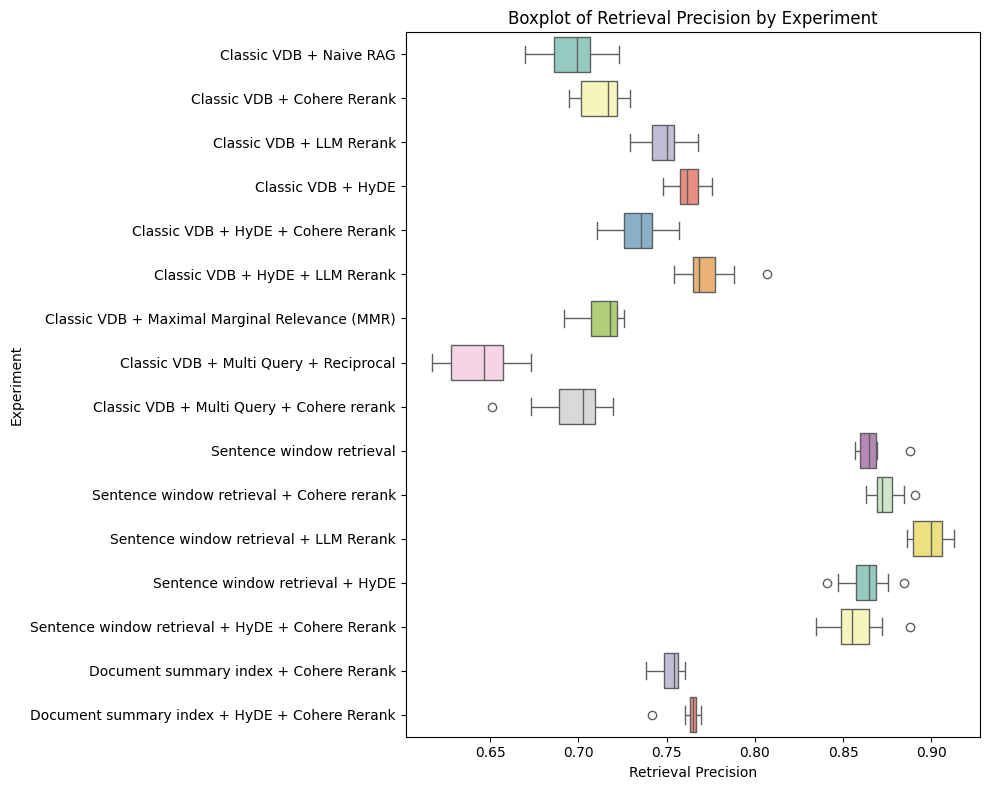

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization of Retrieval Precision across different experiments
plt.figure(figsize=(10, 8))
sns.boxplot(x='retrieval_precision', y='Experiment', data=expanded_data, palette="Set3", orient='h')
plt.title('Boxplot of Retrieval Precision by Experiment')
plt.xlabel('Retrieval Precision')
plt.ylabel('Experiment')
plt.tight_layout()
plt.show()


### Boxplot of Answer Similarity

<ipython-input-25-839d46f944a9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='answer_similarity', y='Experiment', data=expanded_data, palette="Set3", orient='h')


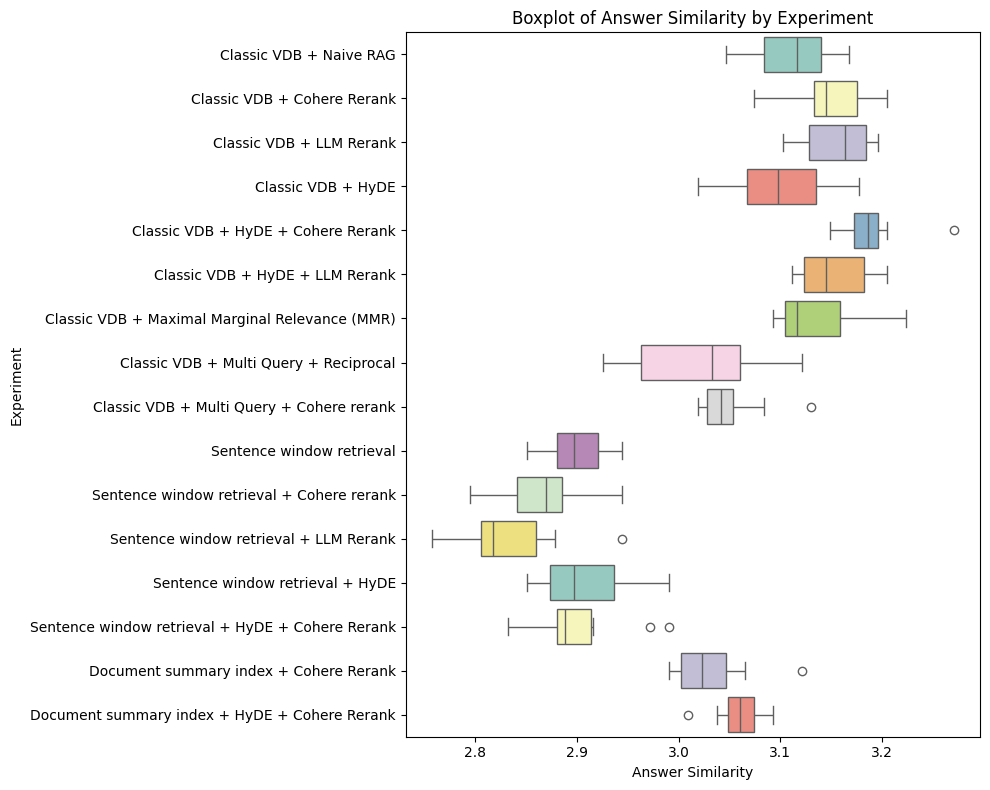

In [25]:
# Visualization of Answer Similarity across different experiments
plt.figure(figsize=(10, 8))
sns.boxplot(x='answer_similarity', y='Experiment', data=expanded_data, palette="Set3", orient='h')
plt.title('Boxplot of Answer Similarity by Experiment')
plt.xlabel('Answer Similarity')
plt.ylabel('Experiment')
plt.tight_layout()
plt.show()


## Statistical Analysis

To statistically evaluate the differences in `retrieval_precision` and `answer_similarity` across various RAG techniques, we perform ANOVA and Tukey's Honestly Significant Difference (HSD) tests. These tests help us determine if the observed differences in metrics are statistically significant, providing a robust basis for comparing the performance of each technique.


### ANOVA

In [26]:
from scipy.stats import f_oneway

# ANOVA for retrieval precision and answer similarity
groups_rp = expanded_data.groupby('Experiment')['retrieval_precision'].apply(list)
groups_as = expanded_data.groupby('Experiment')['answer_similarity'].apply(list)

anova_rp = f_oneway(*groups_rp)
anova_as = f_oneway(*groups_as)

anova_results = {
    'Retrieval Precision': {'statistic': anova_rp.statistic, 'p-value': anova_rp.pvalue},
    'Answer Similarity': {'statistic': anova_as.statistic, 'p-value': anova_as.pvalue}
}

anova_results


{'Retrieval Precision': {'statistic': 338.4387380531311,
  'p-value': 3.903821221672523e-104},
 'Answer Similarity': {'statistic': 77.77379495798307,
  'p-value': 3.6586443584180474e-61}}

### Tukey - all

In [27]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd

tukey_rp = pairwise_tukeyhsd(endog=expanded_data['retrieval_precision'], groups=expanded_data['Experiment'], alpha=0.05)
tukey_result_df = pd.DataFrame(data=tukey_rp.summary().data[1:], columns=tukey_rp.summary().data[0])
tukey_result_df


,group1,group2,meandiff,p-adj,lower,upper,reject
0,Classic VDB + Cohere Rerank,Classic VDB + HyDE,0.0498,0.0000,0.0293,0.0704,True
1,Classic VDB + Cohere Rerank,Classic VDB + HyDE + Cohere Rerank,0.0221,0.0219,0.0016,0.0427,True
2,Classic VDB + Cohere Rerank,Classic VDB + HyDE + LLM Rerank,0.0599,0.0000,0.0393,0.0805,True
3,Classic VDB + Cohere Rerank,Classic VDB + LLM Rerank,0.0364,0.0000,0.0159,0.0570,True
4,Classic VDB + Cohere Rerank,Classic VDB + Maximal Marginal Relevance (MMR),0.0006,1.0000,-0.0199,0.0212,False
...,...,...,...,...,...,...,...
115,Sentence window retrieval + Cohere rerank,Sentence window retrieval + HyDE + Cohere Rerank,-0.0168,0.2521,-0.0374,0.0037,False
116,Sentence window retrieval + Cohere rerank,Sentence window retrieval + LLM Rerank,0.0241,0.0067,0.0036,0.0447,True
117,Sentence window retrieval + HyDE,Sentence window retrieval + HyDE + Cohere Rerank,-0.0053,0.9999,-0.0259,0.0153,False
118,Sentence window retrieval + HyDE,Sentence window retrieval + LLM Rerank,0.0357,0.0000,0.0151,0.0562,True


### Tukey - Naive RAG

In [28]:
# Filter Tukey HSD results to focus on specific group comparisons
filtered_results = tukey_result_df[
    (tukey_result_df['group1'] == "Classic VDB + Naive RAG") |
    (tukey_result_df['group2'] == "Classic VDB + Naive RAG")
]
filtered_results

,group1,group2,meandiff,p-adj,lower,upper,reject
7,Classic VDB + Cohere Rerank,Classic VDB + Naive RAG,-0.0150,0.4515,-0.0355,0.0056,False
21,Classic VDB + HyDE,Classic VDB + Naive RAG,-0.0648,0.0000,-0.0854,-0.0442,True
34,Classic VDB + HyDE + Cohere Rerank,Classic VDB + Naive RAG,-0.0371,0.0000,-0.0576,-0.0165,True
46,Classic VDB + HyDE + LLM Rerank,Classic VDB + Naive RAG,-0.0749,0.0000,-0.0954,-0.0543,True
57,Classic VDB + LLM Rerank,Classic VDB + Naive RAG,-0.0514,0.0000,-0.0720,-0.0308,True
67,Classic VDB + Maximal Marginal Relevance (MMR),Classic VDB + Naive RAG,-0.0156,0.3787,-0.0361,0.0050,False
76,Classic VDB + Multi Query + Cohere rerank,Classic VDB + Naive RAG,0.0012,1.0000,-0.0193,0.0218,False
84,Classic VDB + Multi Query + Reciprocal,Classic VDB + Naive RAG,0.0542,0.0000,0.0336,0.0748,True
92,Classic VDB + Naive RAG,Document summary index + Cohere Rerank,0.0545,0.0000,0.0340,0.0751,True
93,Classic VDB + Naive RAG,Document summary index + HyDE + Cohere Rerank,0.0654,0.0000,0.0449,0.0860,True


### Tukey - best classic vdb techniques


In [29]:
# Focus on experiments for a detailed comparison
experiments_focus_group1 = [
    "Classic VDB + HyDE",
    "Classic VDB + HyDE + Cohere Rerank",
    "Classic VDB + HyDE + LLM Rerank",
    "Classic VDB + LLM Rerank"
]

filtered_results = tukey_result_df[
    tukey_result_df['group1'].isin(experiments_focus_group1) &
    (tukey_result_df['group2'] == "Classic VDB + Naive RAG")
]
filtered_results


,group1,group2,meandiff,p-adj,lower,upper,reject
21,Classic VDB + HyDE,Classic VDB + Naive RAG,-0.0648,0.0,-0.0854,-0.0442,True
34,Classic VDB + HyDE + Cohere Rerank,Classic VDB + Naive RAG,-0.0371,0.0,-0.0576,-0.0165,True
46,Classic VDB + HyDE + LLM Rerank,Classic VDB + Naive RAG,-0.0749,0.0,-0.0954,-0.0543,True
57,Classic VDB + LLM Rerank,Classic VDB + Naive RAG,-0.0514,0.0,-0.0720,-0.0308,True


In [34]:
# Focus on experiments for a detailed comparison
experiments_focus_group1 = [
    "Classic VDB + HyDE",
    "Classic VDB + HyDE + Cohere Rerank",
    "Classic VDB + HyDE + LLM Rerank",
    "Classic VDB + LLM Rerank"
]

filtered_results = tukey_result_df[
    tukey_result_df['group1'].isin(experiments_focus_group1) &
    tukey_result_df['group2'].isin(experiments_focus_group1)
]
filtered_results

,group1,group2,meandiff,p-adj,lower,upper,reject
15,Classic VDB + HyDE,Classic VDB + HyDE + Cohere Rerank,-0.0277,0.0006,-0.0483,-0.0072,True
16,Classic VDB + HyDE,Classic VDB + HyDE + LLM Rerank,0.0101,0.9418,-0.0105,0.0306,False
17,Classic VDB + HyDE,Classic VDB + LLM Rerank,-0.0134,0.6445,-0.0340,0.0072,False
29,Classic VDB + HyDE + Cohere Rerank,Classic VDB + HyDE + LLM Rerank,0.0378,0.0000,0.0172,0.0584,True
30,Classic VDB + HyDE + Cohere Rerank,Classic VDB + LLM Rerank,0.0143,0.5282,-0.0062,0.0349,False
42,Classic VDB + HyDE + LLM Rerank,Classic VDB + LLM Rerank,-0.0235,0.0102,-0.0440,-0.0029,True


### Tukey - best classic vdb vs worst sentence window

In [30]:
# Filter the original Tukey HSD results DataFrame to include only comparisons between the two experiments of interest
filtered_results = tukey_result_df[
    ((tukey_result_df['group1'] == "Classic VDB + HyDE + LLM Rerank") & (tukey_result_df['group2'] == "Sentence window retrieval + Cohere rerank")) |
    ((tukey_result_df['group1'] == "Sentence window retrieval + Cohere rerank") & (tukey_result_df['group2'] == "Classic VDB + HyDE + LLM Rerank"))
]

# Display the filtered results
filtered_results


,group1,group2,meandiff,p-adj,lower,upper,reject
50,Classic VDB + HyDE + LLM Rerank,Sentence window retrieval + Cohere rerank,0.1021,0.0,0.0815,0.1226,True


### Tukey - Sentence Window

In [31]:
# Filter the Tukey HSD results for comparisons involving "Sentence window retrieval"
filtered_results = tukey_result_df[
    (tukey_result_df['group1'] == "Sentence window retrieval")
]

filtered_results

,group1,group2,meandiff,p-adj,lower,upper,reject
110,Sentence window retrieval,Sentence window retrieval + Cohere rerank,0.0090,0.9768,-0.0115,0.0296,False
111,Sentence window retrieval,Sentence window retrieval + HyDE,-0.0025,1.0000,-0.0231,0.0181,False
112,Sentence window retrieval,Sentence window retrieval + HyDE + Cohere Rerank,-0.0078,0.9945,-0.0283,0.0128,False
113,Sentence window retrieval,Sentence window retrieval + LLM Rerank,0.0332,0.0000,0.0126,0.0537,True


### Tukey - Doc summary vs Classic VDB vs Sentence window

In [32]:
# Filter for broader comparisons across selected experiments
filtered_results = tukey_result_df[
    tukey_result_df['group1'].isin([
        "Sentence window retrieval",
        "Classic VDB + Naive RAG",
        "Document summary index + Cohere Rerank"
    ]) & tukey_result_df['group2'].isin([
        "Sentence window retrieval",
        "Classic VDB + Naive RAG",
        "Document summary index + Cohere Rerank"
    ])
]
print(filtered_results)

                                     group1  \
92                  Classic VDB + Naive RAG   
94                  Classic VDB + Naive RAG   
100  Document summary index + Cohere Rerank   

                                     group2  meandiff  p-adj   lower   upper  \
92   Document summary index + Cohere Rerank    0.0545    0.0  0.0340  0.0751   
94                Sentence window retrieval    0.1679    0.0  0.1474  0.1885   
100               Sentence window retrieval    0.1134    0.0  0.0928  0.1340   

     reject  
92     True  
94     True  
100    True  


### Tukey - Doc summary techniques comparison

In [33]:
# Specific pairwise comparison
filtered_results = tukey_result_df[
    (tukey_result_df['group1'] == "Document summary index + Cohere Rerank") &
    (tukey_result_df['group2'] == "Document summary index + HyDE + Cohere Rerank")
]
filtered_results


,group1,group2,meandiff,p-adj,lower,upper,reject
99,Document summary index + Cohere Rerank,Document summary index + HyDE + Cohere Rerank,0.0109,0.8935,-0.0097,0.0315,False
